# Отчет анализа стоимости ювелирных изделий у МЮЗ, дата парсинга -  24 мая 2022

##  Парсинг 
 С сайта https://miuz.ru были спарсены данные ювелирных издели предлагаемых на интернет магазине с фильтром - кольца - основной камнень бриллиант
https://miuz.ru/catalog/rings/filter/stones_main-is-brilliant/ 
Процесс парсинга, реализован в файле ParsingMiuz.ipynb, процесс очистки и расчет прейскуратной стоимости
бриллиантов в файле for_parsing_func.ipynb результат парсинга в файле 'jewels\muiz24-05-2022\mius240522_0-4154.xlsx' линки на карточки "links4154_2410522"
результат расчета прейскуранта в файле '_брилл_суммированы_mius240522_0-4154.xlsx'



Всего колец с фильтром бриллиант на сайте 4022 изделий, часть данных было отброшено по причинам:
- если изделие содержало другие камни или жемчуг кроме бриллианта
- изделие не могло правильно считаться парсером
- характеристики бриллиантов содержало ошибки
- были использованы фантазийные по цвету бриллианты (возможно синтетика)

В результате получен датасет с ювелирными изделиями со следующими данными (параметрами):
- Наименование(кольца только с бриллиантами  в количестве 1889 изделий), бриллиантов 3086
- Ссылка на карточку с изделием (кликабельная ссылка)


После урезания получен датасет с 1676 данными 
общая масса изделий 4.47 кг на сумму 125 млн рублей 
с прейскурантной стоимостью  172  тыс долл


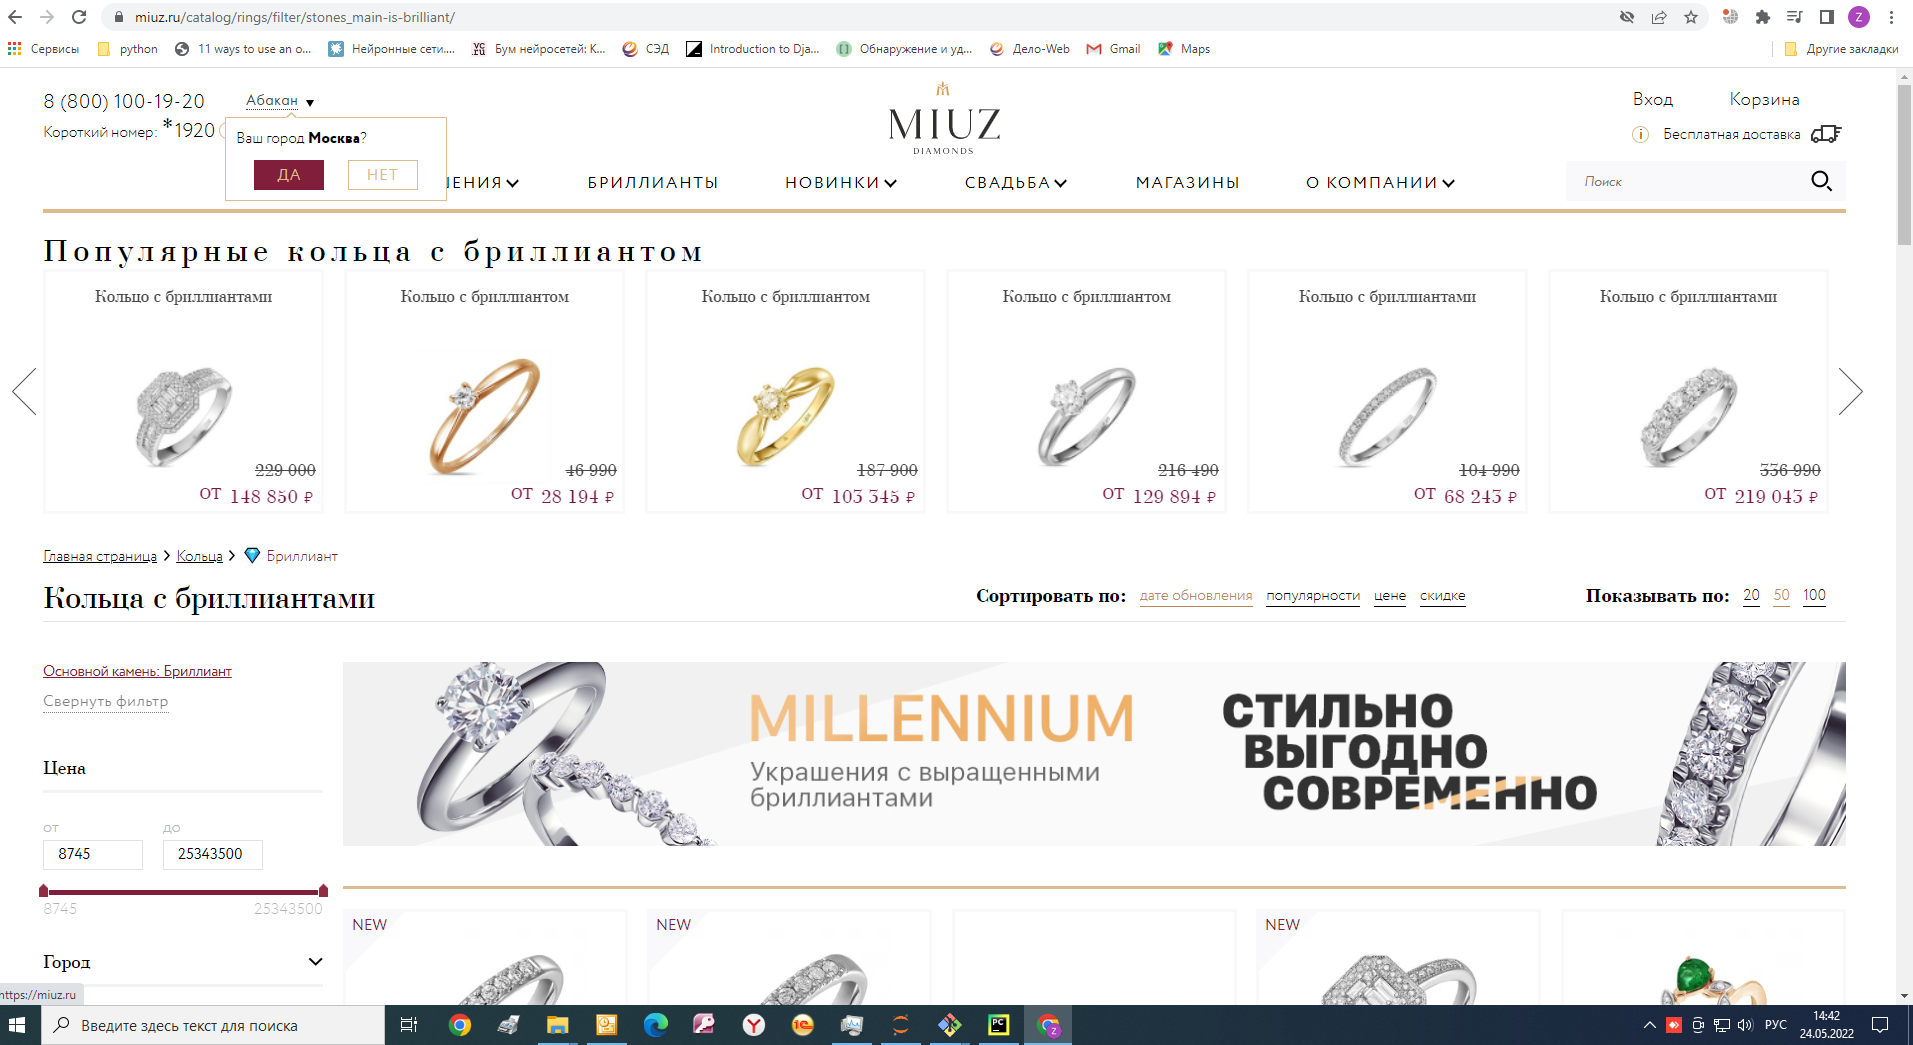

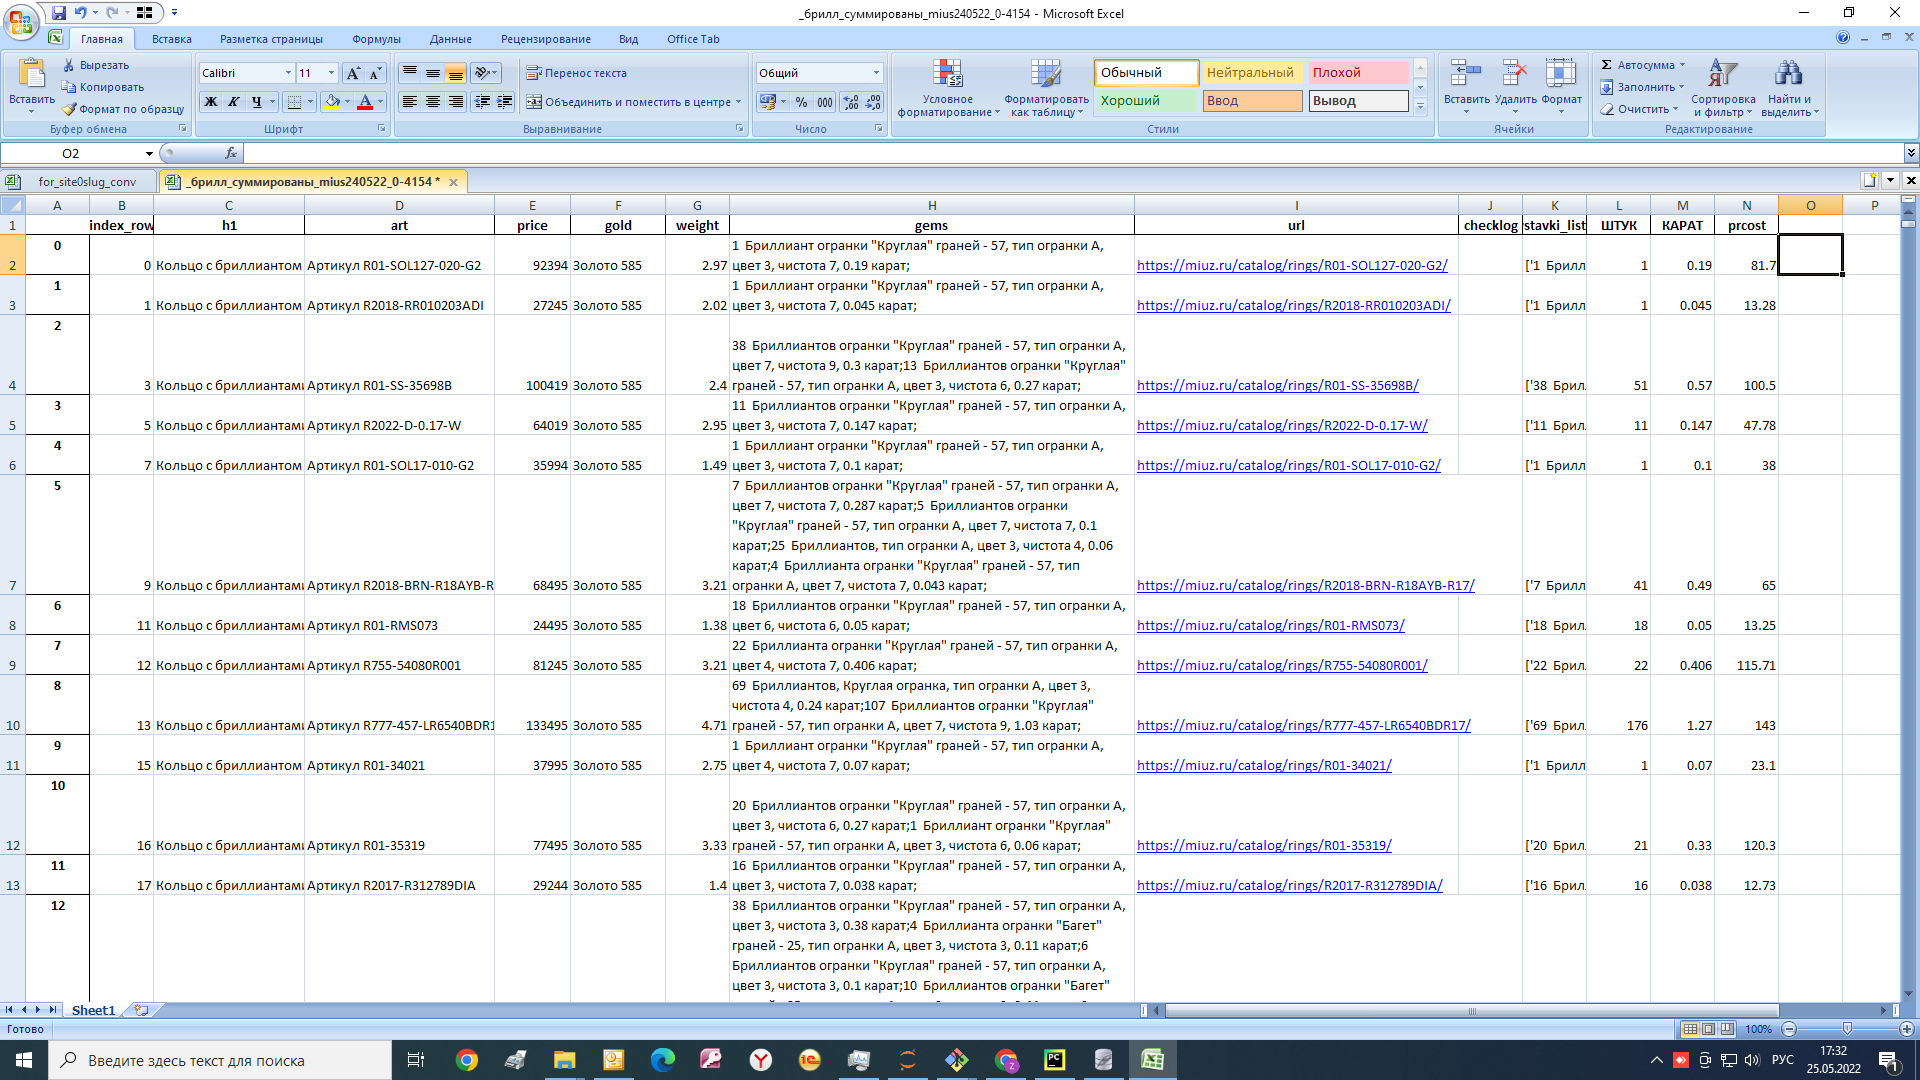

##  Анализ датасета МЮЗ, визуализация, определение коэфициентов
###  Считывание данных с файла
Для этого устанавливаем необходимые модули.
 - загружаем данные с файла 
 #- откыдываем изделия дороже 500т руб, 
 - оставляем изделия пробы 585,
 #- отбрасываем изделия с бриллиантами по прейскуранту свыше 3000 долларов
 - оставлены поля price : цена изделя, weight: масса изделия в граммах, prcost: прейскурант в долларах

In [34]:
import numpy as np
import pandas as pd
import re
import os
import matplotlib.pyplot as plt
#%matplotlib inline
%matplotlib notebook
filenamemiuz = '_брилл_суммированы_mius240522_0-4154.xlsx'
#'jewels/muiz04-2022/_брилл_суммированы_mius140422_0-4431.xlsx'
#'jewels/miuz/_брилл_суммированы_mius161121_0-3178.xlsx'
filepath = 'jewels/muiz24-05-2022/'

In [35]:
filepath+filenamemiuz

'jewels/muiz24-05-2022/_брилл_суммированы_mius240522_0-4154.xlsx'

In [36]:
raw = pd.read_excel(filepath+filenamemiuz,sheet_name=0)

In [38]:
raw = raw.dropna(subset=["art"])

In [39]:
#ошибки парсинга - не прочитались данные
len(raw.loc[raw.gold.isna()])

0

In [40]:
raw = raw.dropna(subset=['gold'])

In [55]:
raw.loc[raw.gold.str.contains('585')].head()

,Unnamed: 0,index_row,h1,art,price,gold,weight,gems,url,checklog,vstavki_list1,ШТУК,КАРАТ,prcost
0,0,0,Кольцо c бриллиантом R01-SOL127-020-G2,Артикул R01-SOL127-020-G2,92394,Золото 585,2.97,"1 Бриллиант огранки ""Круглая"" граней - 57, ти...",https://miuz.ru/catalog/rings/R01-SOL127-020-G2/,NaN,"['1 Бриллиант огранки ""Круглая"" граней - 57, ...",1,0.19,81.70
1,1,1,Кольцо c бриллиантом R2018-RR010203ADI,Артикул R2018-RR010203ADI,27245,Золото 585,2.02,"1 Бриллиант огранки ""Круглая"" граней - 57, ти...",https://miuz.ru/catalog/rings/R2018-RR010203ADI/,NaN,"['1 Бриллиант огранки ""Круглая"" граней - 57, ...",1,0.04,13.28
2,2,3,Кольцо c бриллиантами R01-SS-35698B,Артикул R01-SS-35698B,100419,Золото 585,2.40,"38 Бриллиантов огранки ""Круглая"" граней - 57,...",https://miuz.ru/catalog/rings/R01-SS-35698B/,NaN,"['38 Бриллиантов огранки ""Круглая"" граней - 5...",51,0.57,100.50
3,3,5,Кольцо c бриллиантами R2022-D-0.17-W,Артикул R2022-D-0.17-W,64019,Золото 585,2.95,"11 Бриллиантов огранки ""Круглая"" граней - 57,...",https://miuz.ru/catalog/rings/R2022-D-0.17-W/,NaN,"['11 Бриллиантов огранки ""Круглая"" граней - 5...",11,0.15,47.78
4,4,7,Кольцо c бриллиантом R01-SOL17-010-G2,Артикул R01-SOL17-010-G2,35994,Золото 585,1.49,"1 Бриллиант огранки ""Круглая"" граней - 57, ти...",https://miuz.ru/catalog/rings/R01-SOL17-010-G2/,NaN,"['1 Бриллиант огранки ""Круглая"" граней - 57, ...",1,0.10,38.00


In [56]:
data = raw.loc[(raw.gold.str.contains('585') ),
               ['price','weight','prcost']].loc[(raw.price<500000),
                                                :].loc[(raw.prcost<3000),:]
data.head()

,price,weight,prcost
0,92394,2.97,81.70
1,27245,2.02,13.28
2,100419,2.40,100.50
3,64019,2.95,47.78
4,35994,1.49,38.00


In [44]:
print(f'''После урезания получен датасет с {len(data)} данными 
общая масса изделий {round(data.sum()['weight']/1000,2)} кг на сумму {round(data.sum()['price']/1000000)} млн рублей 
с прейскурантной стоимостью  {round(data.sum()['prcost']/1000)}  тыс долл''') 

После урезания получен датасет с 1676 данными 
общая масса изделий 4.47 кг на сумму 125 млн рублей 
с прейскурантной стоимостью  172  тыс долл


In [45]:
#сумма датасета
data.describe()

,price,weight,prcost
count,1676.000000,1676.000000,1676.000000
mean,74559.841289,2.665161,102.485788
std,66485.361092,1.134081,141.143264
min,12995.000000,0.840000,1.600000
25%,37745.000000,1.910000,31.925000
50%,54819.500000,2.390000,59.925000
75%,81594.750000,3.140000,111.767500
max,499850.000000,9.500000,1484.000000


###  Визуализиация данных
Построим облако точек в трехмерной плоскости
- х вес золота в граммах
- y стоимость прейскурантная бриллиантов
- z стоимость изделия в тысячах рублей

Если покрутить график, то видно что точки стремятся к плоскости



In [46]:
%matplotlib notebook

<IPython.core.display.Javascript object>


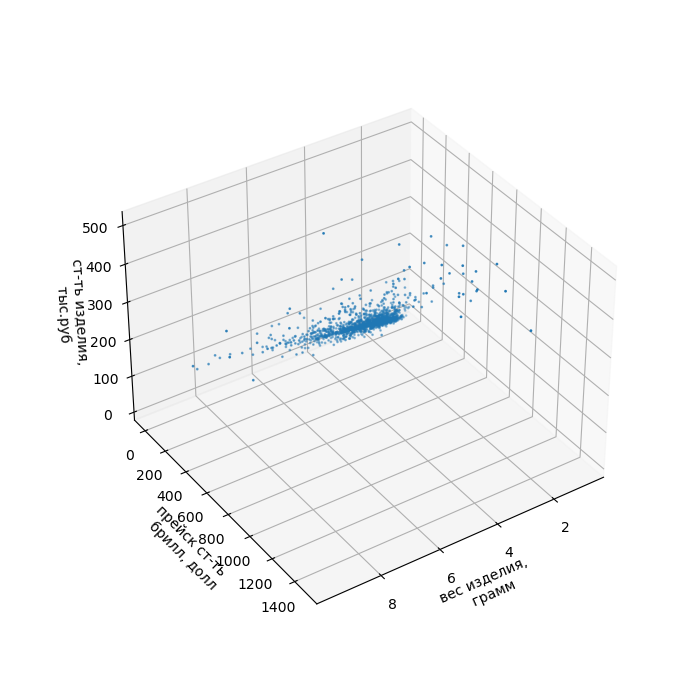

In [47]:
#
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection = "3d")
ax.scatter3D(data.weight,data.prcost,data.price/1000,s=1,c='#1f77b4')
ax.set_xlabel('вес изделия, \n грамм')
ax.set_ylabel('прейск ст-ть \n брилл, долл')
ax.set_zlabel('ст-ть изделия,\n тыс.руб')
ax.view_init(45,0)
#todo 3 projection need

### Подготовка данных для определения коэффициентов  

Для того чтобы полученные коэффициенты имели интерпретируемый смысл, предлагается прейскурантную стоимость бриллиантов перевести в рубли, граммы золота перевести в биржевую стоимость золота, данного веса изделия в рублях. 

In [58]:
#Курс доллара и биржевая цена золота на 03-12-2021
dollar_rate = 72.10
gold_rate = 4300.0
#Курс доллара и биржевая цена золота на 19-04-2022
#dollar_rate = 80.36
#gold_rate = 5015.06
data['prcost_rub'] = data.prcost*dollar_rate
data['gold_rub'] = data.weight*0.585*gold_rate
pd.options.display.float_format ="{:.2f}".format
data.head()

,price,weight,prcost,prcost_rub,gold_rub
0,92394,2.97,81.70,5890.57,7471.03
1,27245,2.02,13.28,957.49,5081.31
2,100419,2.40,100.50,7246.05,6037.20
3,64019,2.95,47.78,3444.94,7420.72
4,35994,1.49,38.00,2739.80,3748.09


<IPython.core.display.Javascript object>


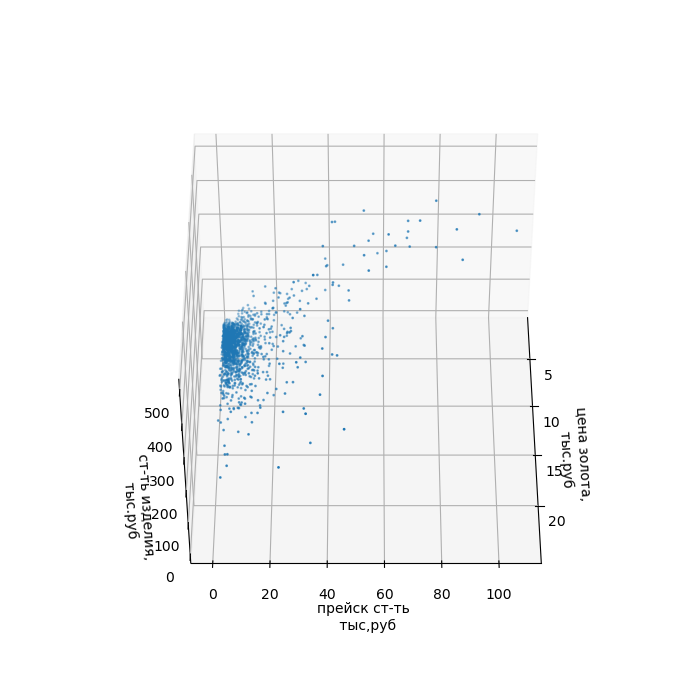

In [60]:
#новое графическое представление будеть иметь вид
fig2 = plt.figure(figsize=(7,7))
ax = plt.gca(projection = "3d")
ax.scatter3D(data.gold_rub/1000,data.prcost_rub/1000,data.price/1000,s=1,c='#1f77b4')
ax.set_xlabel('цена золота, \n тыс.руб')
ax.set_ylabel('прейск ст-ть \n тыс,руб')
ax.set_zlabel('ст-ть изделия,\n тыс.руб')
ax.view_init(45,0)

Цена ювелирного изделия в первом приближении формируется линейной зависимостью, если обозначить за Z - цену издели, X - масса золота, Y - прейскурнтная стоимость бриллианов то можно записть закономерностю вида:

$$ Z = f(X,Y) = НДС*СКИДКА*НАЦЕНКА*\\(ПРОБА*БИРЖЕВАЯСТОИМОСТ*НАЦЕНКАЗОЛОТА*СЛОЖНОСТЬ*X\\ 
+НАЦЕНКАПРЕЙСКУРАНТ*СЛОЖНОСТЬ*Y+НАЦЕНКАБЕЗДКДМ) $$
можно раскрыть скобки, перемножить множители и мы получим уравнение вида:
$$ Z = A*X+B*Y+C $$
линейное уравнение такого вида в трехмерной плоскости является плоскостью, поэтому необходимо усредненную плоскость и найти эти три коэффициента.

###  Вычисление коэффициентов усредненой по облаку данных плоскости  

Для этого мы устанавливаем модуль отвечающий за расчеты линейной алгебры, и загружаем наши данные для расчета коэффициентов, и получаем коэффициенты



In [63]:
from sklearn import linear_model
#подготовка данных 
miuz = linear_model.LinearRegression()
X_train = data.iloc[:,:].loc[:,['gold_rub','prcost_rub']].to_numpy()
Y_train = data.iloc[:,:].loc[:,'price'].to_numpy()
miuz.fit(X_train,Y_train)
A,B = miuz.coef_
C =  miuz.intercept_
A,B,C

(4.610991704825663, 5.682050815863749, 1660.8183892750385)

### Визуальная проверка полученных коэффициентов

In [64]:
#проверка
data['predict'] = miuz.predict(X_train)
data['bycoef'] = data.gold_rub*miuz.coef_[0] + data.prcost_rub*miuz.coef_[1]+miuz.intercept_
data['diff'] = data.predict-data.bycoef
data.head()

,price,weight,prcost,prcost_rub,gold_rub,predict,bycoef,diff
0,92394,2.97,81.70,5890.57,7471.03,69580.22,69580.22,0.00
1,27245,2.02,13.28,957.49,5081.31,30531.19,30531.19,0.00
2,100419,2.40,100.50,7246.05,6037.20,70670.72,70670.72,0.00
3,64019,2.95,47.78,3444.94,7420.72,55452.03,55452.03,0.00
4,35994,1.49,38.00,2739.80,3748.09,34510.94,34510.94,0.00


Усредненная по нашим данным плоскость и коэффициенты посчитаны модулем по методу наименьних квадратов, постороим на плоскость построенной плоскости для проверки

<IPython.core.display.Javascript object>


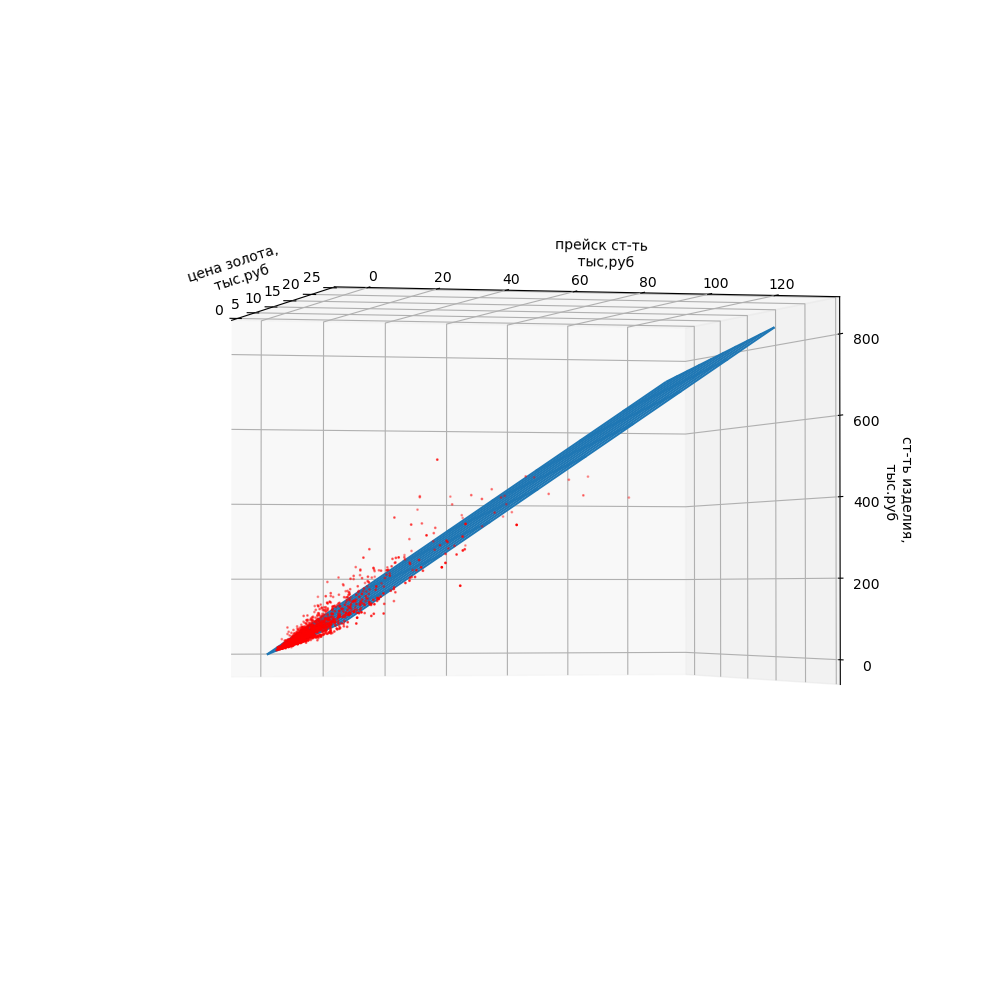

Text(0.5, 0, 'ст-ть изделия,\n тыс.руб')

In [65]:
x_val = np.linspace(0,20000,10)# np.arange(0, 20000,5000)
y_val = np.linspace(0,130000,10)
xx,yy = np.meshgrid(x_val,y_val)
zz = A*xx + B*yy + C/1000
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot_wireframe(xx/1000, yy/1000, zz/1000 )
ax.scatter3D(data.gold_rub/1000,data.prcost_rub/1000,data.price/1000,s=1,c='red')
#ax.scatter3D(data.gold_rub/1000,data.prcost_rub/1000,data.predict/1000,s=1,c='red')
#ax.scatter3D(data.gold_rub/1000,data.prcost_rub/1000,data.bycoef/1000,s=1,c='green')
ax.set_xlabel('цена золота, \n тыс.руб')
ax.set_ylabel('прейск ст-ть \n тыс,руб')
ax.set_zlabel('ст-ть изделия,\n тыс.руб')
#ax.plot_surface(xx/1000, yy/1000, zz/1000)

<IPython.core.display.Javascript object>


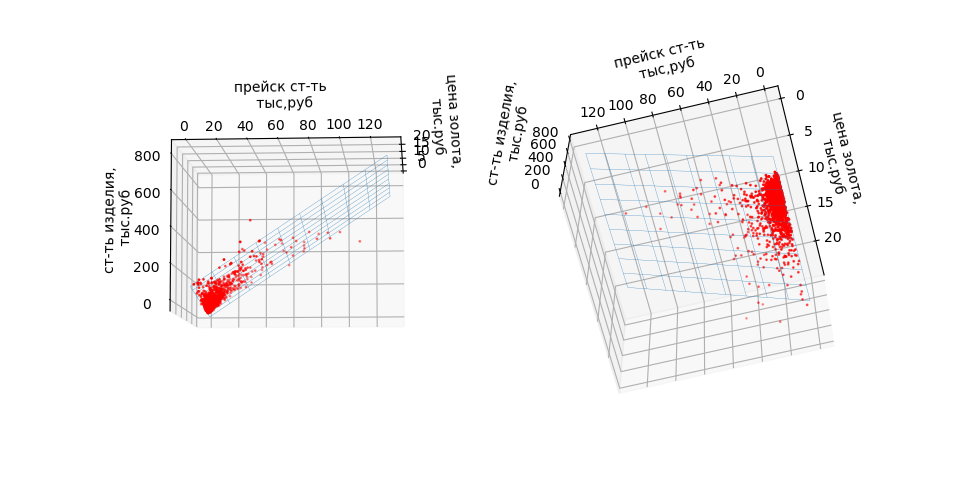

In [53]:
fig = plt.figure(figsize=plt.figaspect(0.5))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_wireframe(xx/1000, yy/1000, zz/1000, linewidth=0.2 )
ax.scatter3D(data.gold_rub/1000,data.prcost_rub/1000,data.price/1000,s=1,c='red')
ax.set_xlabel('цена золота, \n тыс.руб')
ax.set_ylabel('прейск ст-ть \n тыс,руб')
ax.set_zlabel('ст-ть изделия,\n тыс.руб')
ax.view_init(-7,4)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_wireframe(xx/1000, yy/1000, zz/1000, linewidth=0.2 )
ax.scatter3D(data.gold_rub/1000,data.prcost_rub/1000,data.price/1000,s=1,c='red')
ax.set_xlabel('цена золота, \n тыс.руб')
ax.set_ylabel('прейск ст-ть \n тыс,руб')
ax.set_zlabel('ст-ть изделия,\n тыс.руб')
ax.view_init(-66,-166)


# Выводы 
Реализованная модель анализа цен ювелирных изделий с бриллиантами позволяет получить усредненную информацию по ценообразованию.
В анализируемой партии изделий получены следующие коэффициенты цены изделия  

In [69]:
print(f''' A = {A:2.2f} \n B = {B:2.2f}  \n C = {C:2.2f}''')

 A = 4.61 
 B = 5.68  
 C = 1660.82


где 
формула - $$ Z = A*X+B*Y+C $$
Z - стоимость изделия в рублях со всеми накрутками с учетом ндс и скидки
X - биржевая стоимость золота, данного веса изделия в рублях
Y - прейскурантная стоимость бриллиантов в рублях
С - наценка в рублях не зависящая от граммов изделия и вставок

Для сравнения в прошлом анализе, подобной партии МЮЗ в (ноябрь 2021) были получены следующие коэффициенты:

$$А = 3.3$$
$$В = 4.0$$
$$С = 2205$$

